# 2nd Homework


Neptun - YUMXHI

My homework is in 2 parts.
The first part contains the first 3 tasks, the 2nd the mini-batch task.

   For the first part I didn't change the code much so I kept it as it was and just added the different ways to
calculate regularization and momentum. 2 out of 3 are commented out since they affect the same variable.

   The 2nd part of the homework is a modfied version the the original code, to make it work with mini-batch, I removed
the original hungarian comments and left only my comments that show what I changed and why.

   I also moved the 2 parts into single cells.

0 epoch, train_err: 0.2463, valid_err: 0.2383
1 epoch, train_err: 0.2309, valid_err: 0.2231
2 epoch, train_err: 0.2101, valid_err: 0.1976
3 epoch, train_err: 0.1796, valid_err: 0.1644
4 epoch, train_err: 0.1451, valid_err: 0.1326
5 epoch, train_err: 0.1156, valid_err: 0.1085
6 epoch, train_err: 0.0944, valid_err: 0.0919
7 epoch, train_err: 0.0801, valid_err: 0.0807
8 epoch, train_err: 0.0705, valid_err: 0.0728
9 epoch, train_err: 0.0637, valid_err: 0.0672
10 epoch, train_err: 0.0588, valid_err: 0.0629
11 epoch, train_err: 0.0551, valid_err: 0.0596
12 epoch, train_err: 0.0522, valid_err: 0.0570
13 epoch, train_err: 0.0498, valid_err: 0.0549
14 epoch, train_err: 0.0479, valid_err: 0.0531
15 epoch, train_err: 0.0463, valid_err: 0.0516
16 epoch, train_err: 0.0450, valid_err: 0.0504
17 epoch, train_err: 0.0438, valid_err: 0.0493
18 epoch, train_err: 0.0428, valid_err: 0.0484
19 epoch, train_err: 0.0419, valid_err: 0.0475
20 epoch, train_err: 0.0411, valid_err: 0.0468
21 epoch, train_err: 0.

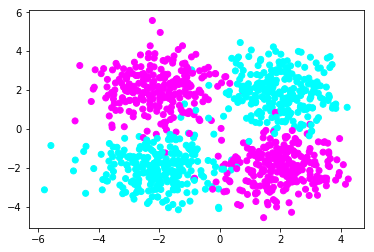

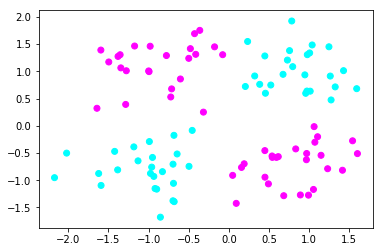

In [21]:
# FIRST PART
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import copy

def activation(x):
    return 1 / (1 + np.exp(-x))

def dactivation(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

# MLP osztály létrehozása.
class MLP:
    
    # A hálózat inicializálása az argumentumként megadott méretek alapján.
    def __init__(self, *args):
        # random seed megadása
        np.random.seed(123)
        # A hálózat formája (rétegek száma), amely megegyezik a paraméterek számával
        self.shape = args
        n = len(args)
        # Rétegek létrehozása
        self.layers = []
        # Bemeneti réteg létrehozása (+1 egység a BIAS-nak)
        self.layers.append(np.ones(self.shape[0]+1))
        # Rejtett réteg(ek) és a kimeneti réteg létrehozása
        for i in range(1,n):
            self.layers.append(np.ones(self.shape[i]))
        # Súlymátrix létrehozása
        self.weights = []
        for i in range(n-1):
            self.weights.append(np.zeros((self.layers[i].size,
                                         self.layers[i+1].size)))
        # dw fogja tartalmazni a súlyok utolsó módosításait (később pl. a momentum módszer számára)
        self.dw = [0,]*len(self.weights)
        # Súlyok újrainicializálása
        self.reset()
    
    # Súlyok újrainicializálási függvényének definiálása
    def reset(self):
        for i in range(len(self.weights)):
            # véletlen számok [0,1) tartományban 
            Z = np.random.random((self.layers[i].size,self.layers[i+1].size))
            # átskálázzuk a súlyokat -1..1 tartományba
            self.weights[i][...] = (2*Z-1)*1

    # A bemenő adatok végigküldése a hálózaton, kimeneti rétegig (forward propagation)
    def propagate_forward(self, data):
        # Bemeneti réteg beállítása (tanító adatok)
        self.layers[0][0:-1] = data
        # Az adatok végigküldése a bemeneti rétegtől az utolsó előtti rétegig (az utolsó ugyanis a kimeneti réteg).
        # A szigmoid aktivációs függvény használatával, mátrixszorzások alkalmazásával.
        # Az előadáson a "layers" változót jelöltük "a"-val.
        for i in range(1,len(self.shape)):
            self.layers[i][...] = activation(np.dot(self.layers[i-1],self.weights[i-1]))
        # Visszatérés a hálózat által becsült eredménnyel
        return self.layers[-1]

    # Hibavisszaterjesztés (backpropagation) definiálása. 
    # A a learning rate (tanulási ráta) paraméter befolyásolja, hogy a hálózat súlyait milyen
    # mértékben módosítsuk a gradiens függvényében. Ha ez az érték túl magas, akkor a háló 
    # "oszcillálhat" egy lokális vagy globális minimum körül. Ha túl kicsi értéket választunk,
    # akkor pedig jelentősen több időbe telik mire elérjük a legjobb megoldást vagy leakad egy lokális 
    # minimumban és sose éri el azt.
    
    def propagate_backward(self, target, lrate=0.1):
        deltas = []
        # Hiba kiszámítása a kimeneti rétegen
        error = -(target-self.layers[-1]) # y-y_kalap
        # error*dactivation(s(3))
        delta = np.multiply(error,dactivation(np.dot(self.layers[-2],self.weights[-1])))
        deltas.append(delta)
        # Gradiens kiszámítása a rejtett réteg(ek)ben
        for i in range(len(self.shape)-2,0,-1):
            # pl. utolsó rejtett réteg: delta(3)*(W(2).T)*dactivation(s(2)) (lásd előadás)
            delta=np.dot(deltas[0],self.weights[i].T)*dactivation(np.dot(self.layers[i-1],self.weights[i-1]))
            deltas.insert(0,delta)            
        # Súlyok módosítása
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            
            # pl. utolsó rétegben: delta(3)*a(2) (lásd előadás)
            dw = -lrate*np.dot(layer.T,delta)
            
            # HF2 start momentum
            # delta W with momentum from the lecture: dW(t) = -lrate * grad + alpha * (the previous delta)
            # the previous delta is stored in self.dw[i] for the ith layer
            alpha = 0.7
            #dw = -lrate*np.dot(layer.T,delta) + alpha * self.dw[i]
            # HF2 end momentum
            
            # HF2 start L1 regularization
            # I started from 0.01 and gradually went down until the model seemed to reach similar error
            # as without the L1 reg.
            lambda1 = 0.0001
            dw = -lrate*np.dot(layer.T,delta) - lrate * lambda1 * np.sign(self.weights[i])
            # HF2 end L1 regularization
            
            # HF2 start L2 regularization
            # Because of the previous tests, i started with l2 = 0.001 where the model
            # didn't learn, when I used 0.0001 it started learning properly.
            lambda2 = 0.0001
            #dw = -lrate*np.dot(layer.T,delta) - lrate * lambda2 * self.weights[i]
            # HF2 end L2 regularization
            
            # súlyok módosítása
            self.weights[i] += dw 

            # a súlymódosítás eltárolása
            self.dw[i] = dw

        # Visszatérés a hibával
        return (error**2).sum()
    
def learn(network, X, Y, valid_split, test_split, epochs=100, lrate=0.1):

        # train-validation-test minták különválasztása
        X_train = X[0:int(nb_samples*(1-valid_split-test_split))]
        Y_train = Y[0:int(nb_samples*(1-valid_split-test_split))]
        X_valid = X[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        Y_valid = Y[0:int(nb_samples*(1-valid_split-test_split))]
        X_test  = X[int(nb_samples*(1-test_split)):]
        Y_test  = Y[int(nb_samples*(1-test_split)):]
    
        # standardizálás
        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test  = scaler.transform(X_test)
    
        # ugyanolyan sorrendben keverjük be a bemeneteket és kimeneteket, a három külön adatbázisra
        randperm = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[randperm], Y_train[randperm]
        randperm = np.random.permutation(len(X_valid))
        X_valid, Y_valid = X_valid[randperm], Y_valid[randperm]
        randperm = np.random.permutation(len(X_test))
        X_test, Y_test = X_test[randperm], Y_test[randperm]
        
        best_valid_err = np.inf
        es_counter = 0 # early stopping counter
        best_model = network
    
        # Tanítási fázis, epoch-szor megyünk át 1-1 véltelenszerűen kiválasztott mintán.
        for i in range(epochs):
            # Jelen megoldás azt a módszert használja, hogy a megadott 
            # tanító adatokon végigmegyünk és minden elemet először végigküldünk
            # a hálózaton, majd terjeszti vissza a kapott eltérést az
            # elvárt eredménytől. Ezt hívjuk SGD-ek (stochastic gradient descent).
    
            train_err = 0
            for k in range(X_train.shape[0]):
                network.propagate_forward( X_train[k] )
                train_err += network.propagate_backward( Y_train[k], lrate )
            train_err /= X_train.shape[0]

            # validációs fázis
            valid_err = 0
            o_valid = np.zeros(X_valid.shape[0])
            for k in range(X_valid.shape[0]):
                o_valid[k] = network.propagate_forward(X_valid[k])
                valid_err += (o_valid[k]-Y_valid[k])**2
            valid_err /= X_valid.shape[0]

            print("%d epoch, train_err: %.4f, valid_err: %.4f" % (i, train_err, valid_err))

        # Tesztelési fázis
        print("\n--- TESZTELÉS ---\n")
        test_err = 0
        o_test = np.zeros(X_test.shape[0])
        for k in range(X_test.shape[0]):
            o_test[k] = network.propagate_forward(X_test[k])
            test_err += (o_test[k]-Y_test[k])**2
            print(k, X_test[k], '%.2f' % o_test[k], ' (elvart eredmeny: %.2f)' % Y_test[k])
        test_err /= X_test.shape[0]

        fig1=plt.figure()
        plt.scatter(X_test[:,0], X_test[:,1], c=np.round(o_test[:]), cmap=plt.cm.cool)
        
# Mesterséges neurális hálózat létrehozása, 2 bemenettel, 10 rejtett neuronnal és 1 kimenettel
network = MLP(2,10,1)
# Tanító, validációs és teszt adatok megadása a rendszernek (zajjal terhelt XOR adatok)
nb_samples=1000
X = np.zeros((nb_samples,2))
Y = np.zeros(nb_samples)
for i in range(0,nb_samples,4):
    noise = np.random.normal(0,1,8)
    X[i], Y[i] = (-2+noise[0],-2+noise[1]), 0
    X[i+1], Y[i+1] = (2+noise[2],-2+noise[3]), 1
    X[i+2], Y[i+2] = (-2+noise[4],2+noise[5]), 1
    X[i+3], Y[i+3] = (2+noise[6],2+noise[7]), 0

# ...és az adatok kirajzolása
fig1=plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y[:], cmap=plt.cm.cool)
network.reset()
# call learn with batch_size
learn(network, X, Y, 0.2, 0.1)
print("weights[0]")
print(network.weights[0])
print("weights[1]")
print(network.weights[1])


I printed out the weights in all 3 cases
results showed that with l1 reg many weights got very close to 0, one example
    is: 7.27541000e-06. Which is practically 0.
    
With l2 reg:
 some weight became small but none of them were as close to zero as with l1 reg
 
with momentum:
  there weren't any really small weights but it did reach better validation error in the same number of epochs, other than
  that I'm not sure if I should be seeing anything from the weights.


In [22]:
# reset variables
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


0 epoch, train_err: 0.2467, valid_err: 0.2383
1 epoch, train_err: 0.2299, valid_err: 0.2216
2 epoch, train_err: 0.2074, valid_err: 0.1939
3 epoch, train_err: 0.1748, valid_err: 0.1591
4 epoch, train_err: 0.1393, valid_err: 0.1274
5 epoch, train_err: 0.1102, valid_err: 0.1044
6 epoch, train_err: 0.0900, valid_err: 0.0889
7 epoch, train_err: 0.0766, valid_err: 0.0783
8 epoch, train_err: 0.0675, valid_err: 0.0709
9 epoch, train_err: 0.0612, valid_err: 0.0655
10 epoch, train_err: 0.0565, valid_err: 0.0614
11 epoch, train_err: 0.0530, valid_err: 0.0582
12 epoch, train_err: 0.0503, valid_err: 0.0556
13 epoch, train_err: 0.0481, valid_err: 0.0536
14 epoch, train_err: 0.0462, valid_err: 0.0518
15 epoch, train_err: 0.0447, valid_err: 0.0504
16 epoch, train_err: 0.0434, valid_err: 0.0491
17 epoch, train_err: 0.0423, valid_err: 0.0481
18 epoch, train_err: 0.0413, valid_err: 0.0471
19 epoch, train_err: 0.0404, valid_err: 0.0463
20 epoch, train_err: 0.0396, valid_err: 0.0456
21 epoch, train_err: 0.

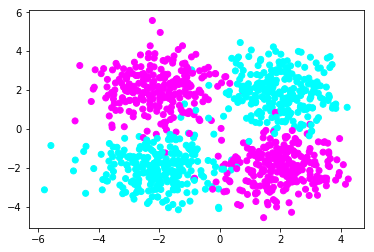

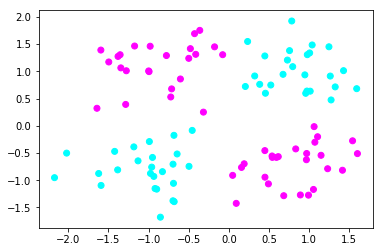

In [24]:
# SECOND PART
# HF2 start mini-batch
# I separated the code for minibatch from the previous 3 tasks, as I had to change quite a few things
# in the original code to get the mini-batch processing to work.
# In my solution I made it so the batch_size is a parameter only the learn function has to know, and then set it to 16 because
# that was the size given in the homework.

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import copy

def activation(x):
    return 1 / (1 + np.exp(-x))
def dactivation(x):
    return np.exp(-x)/((1+np.exp(-x))**2)

class MLP:    

    def __init__(self, *args):
        np.random.seed(123)
        self.shape = args
        # real_shape accounts for the bias
        self.real_shape = list(self.shape)
        self.real_shape[0] += 1 #+1 for bias
        n = len(self.shape)

        self.layers = []
        # Init layers with empty numpy arrays so their dimensions can dynamically change, because training
        # is done with mini batches, while I validate, test with singles inputs.
        # this means I can have varying sized matrices in layers.
        for i in range(len(self.shape)):
            x = np.array(0)
            self.layers.append(x)
        # Because I initialize layers with empty arrays I don't add bias at this point, only 
        # in the propagate_forward method.
        
        #print("layers:")
        #print(str(self.layers))
        self.weights = []
        # Since I couldn't use layers shape to init weights I just used the self.shape property
        for i in range(n-1):
            self.weights.append(np.zeros((self.real_shape[i],
                                         self.real_shape[i+1])))
        #print("weights:")
        #print(str(self.weights))
        self.dw = [0,]*len(self.weights)
        self.reset()
    

    def reset(self):
        for i in range(len(self.weights)):
            # switched to using real_shape property here as well
            Z = np.random.random((self.real_shape[i],self.real_shape[i+1]))
            self.weights[i][...] = (2*Z-1)*1
  
    def propagate_forward(self, data):
        # get the length of the data to determine the length of the bias vector
        # since I want to add as many bias '1'-s as there are inputs I need the number of rows -> shape[0]
        data_len = data.shape[0]
        # finally I add the bias to the input as a column on the right side of the matrix
        data = np.c_[data, np.ones(data_len)]
        self.layers[0]=data
        for i in range(1,len(self.shape)):
            # removed the [...] indexing, because the shape of layers[i] can change 
            self.layers[i] = activation(np.dot(self.layers[i-1],self.weights[i-1]))
            
        return self.layers[-1]
    
    def propagate_backward(self, target, lrate=0.1):
        deltas = []
        error = -(target-self.layers[-1]) # y-y_kalap
        # np.multiply was originally here which is good since even on mini-batch processing the deltas are separate
        # values for the inputs, so regular multiplication is required and not np.dot
        delta = np.multiply(error,dactivation(np.dot(self.layers[-2],self.weights[-1])))
        deltas.append(delta)
        for i in range(len(self.shape)-2,0,-1):
            # I didn't have to change anything here since layers can be still indexed the same way
            delta=np.dot(deltas[0],self.weights[i].T)*dactivation(np.dot(self.layers[i-1],self.weights[i-1]))
            deltas.insert(0,delta)            
        for i in range(len(self.weights)):
            layer = np.atleast_2d(self.layers[i])
            delta = np.atleast_2d(deltas[i])
            dw = -lrate*np.dot(layer.T,delta)
            self.weights[i] += dw 
            self.dw[i] = dw
        # error is a vector so .sum() here is still a good way to accumulate error inside a batch
        return (error**2).sum()
    
# added batch_size as a parameter, only learn needs to know what the batch size is    
def learn(batch_size, network, X, Y, valid_split, test_split, epochs=50, lrate=0.1):

        X_train = X[0:int(nb_samples*(1-valid_split-test_split))]
        Y_train = Y[0:int(nb_samples*(1-valid_split-test_split))]
        X_valid = X[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        Y_valid = Y[int(nb_samples*(1-valid_split-test_split)):int(nb_samples*(1-test_split))]
        X_test  = X[int(nb_samples*(1-test_split)):]
        Y_test  = Y[int(nb_samples*(1-test_split)):]

        scaler = preprocessing.StandardScaler().fit(X_train)
        X_train = scaler.transform(X_train)
        X_valid = scaler.transform(X_valid)
        X_test  = scaler.transform(X_test)

        randperm = np.random.permutation(len(X_train))
        X_train, Y_train = X_train[randperm], Y_train[randperm]
        randperm = np.random.permutation(len(X_valid))
        X_valid, Y_valid = X_valid[randperm], Y_valid[randperm]
        randperm = np.random.permutation(len(X_test))
        X_test, Y_test = X_test[randperm], Y_test[randperm]
        
        best_valid_err = np.inf
        es_counter = 0 
        best_model = network
    

        for i in range(epochs):
            train_err = 0
            # iterate thought the input array with batch_sized steps
            for k in range(0,X_train.shape[0],batch_size):
                # if the legnth % batch_size != 0 then the last batch will be shorter
                # in this case I use act_len to do the reshaping of the target vector when propagating backward
                act_len = len(X_train[k:k+batch_size])
                if act_len == batch_size:
                    # get batch_size sized chunks and propagate them forward
                    # I use at_least_2d to make sure the 
                    cur_data = X_train[k:k+batch_size]
                    network.propagate_forward( cur_data)
                    # needed to reshape the target vector for propagate_backward since It requires a column vector
                    target_batch = np.asarray(Y_train[k:k+batch_size]).reshape((batch_size,1))
                    train_err += network.propagate_backward(target_batch, lrate )
                else: #the end of the dataset might be shorter, in this case i use act_len to reshape the vector
                    cur_data = np.atleast_2d(X_train[k:k+batch_size])
                    network.propagate_forward( cur_data)
                    target_batch = np.asarray(Y_train[k:k+batch_size]).reshape((act_len,1))
                    train_err += network.propagate_backward(target_batch, lrate ) 
                    
            train_err /= X_train.shape[0]

            # I kept the validation and test code mostly the same because I didn't think these needed to be done in
            # mini-batches
            valid_err = 0
            o_valid = np.zeros(X_valid.shape[0])
            for k in range(X_valid.shape[0]):
                # here I had to use np.atleast_2d, since getting an input with a single index returns only a 1D array
                # while the new propagate_forward treats the input as a matrix
                o_valid[k] = network.propagate_forward(np.atleast_2d(X_valid[k]))
                valid_err += (o_valid[k]-Y_valid[k])**2
            valid_err /= X_valid.shape[0]

            print("%d epoch, train_err: %.4f, valid_err: %.4f" % (i, train_err, valid_err))


        print("\n--- TESTING ---\n")
        test_err = 0
        o_test = np.zeros(X_test.shape[0])
        for k in range(X_test.shape[0]):
            # same reason for the np.atleast_2d() use here as above
            o_test[k] = network.propagate_forward(np.atleast_2d(X_test[k]))
            test_err += (o_test[k]-Y_test[k])**2
            print(k, X_test[k], '%.2f' % o_test[k], ' (y: %.2f)' % Y_test[k])
        test_err /= X_test.shape[0]

        fig1=plt.figure()
        plt.scatter(X_test[:,0], X_test[:,1], c=np.round(o_test[:]), cmap=plt.cm.cool)
        
# the size of the mini-batch       
batch_size = 16
network = MLP(2,10,1)
nb_samples=1000
X = np.zeros((nb_samples,2))
Y = np.zeros(nb_samples)
for i in range(0,nb_samples,4):
    noise = np.random.normal(0,1,8)
    X[i], Y[i] = (-2+noise[0],-2+noise[1]), 0
    X[i+1], Y[i+1] = (2+noise[2],-2+noise[3]), 1
    X[i+2], Y[i+2] = (-2+noise[4],2+noise[5]), 1
    X[i+3], Y[i+3] = (2+noise[6],2+noise[7]), 0

fig1=plt.figure()
plt.scatter(X[:,0],X[:,1],c=Y[:], cmap=plt.cm.cool)

network.reset()
# call learn with batch_size
learn(batch_size, network, X, Y, 0.2, 0.1)

# HF2 end mini-batch

 I tested the code by printing the sizes of layers and weights, which showed me that the dimensons
 layers[i] got, were correct after the forward steps.
 The network still works with SGD if batch_size is set to '1'.
 The results seem to show that the network still learns correctly so  I concluded that this probably works.